<a href="https://colab.research.google.com/github/sara87821/machine_learning/blob/main/decision_tree(Boston).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

boston=load_boston()

df=pd.DataFrame(boston['data'],
        columns=boston['feature_names'])
df["target"]=boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


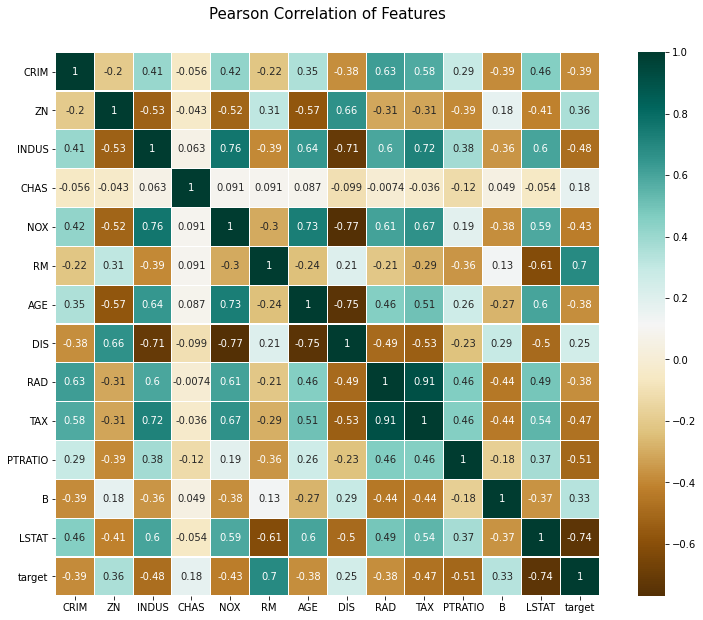

In [ ]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(df.astype(float).corr(),cmap="BrBG",linewidths=0.1,
            square=True,linecolor='white',annot=True)

In [ ]:
# sklearn前: pandas.DataFrame
# sklearn後: np.array
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test=train_test_split(
    boston['data'],
    boston['target'],
    test_size=0.1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=3)
regr.fit(data_train,target_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

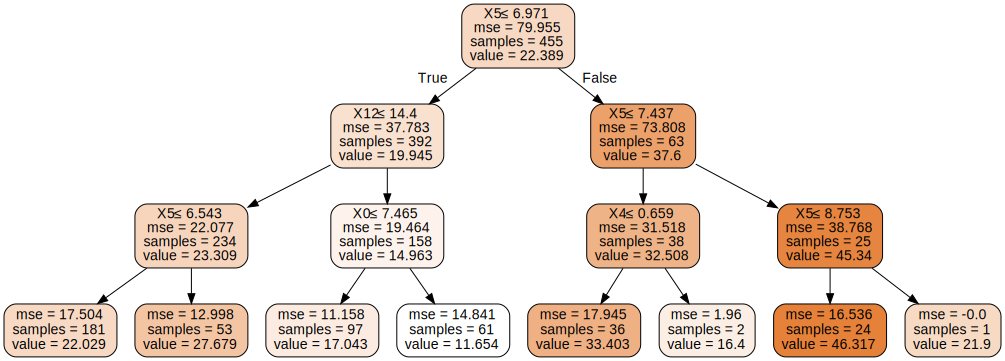

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(regr,out_file=None,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)

graph 

In [ ]:
import numpy as np
predict = regr.predict(data_test)
print("實際的價錢：",target_test)
print("預測的價錢：",predict)
interval=np.subtract(predict,target_test)
print("差異:",interval)

實際的價錢： [12.7 21.7 21.2 23.1 35.2 22.  23.4  7.5 11.  14.2 18.7 33.1  5.6 19.3
 22.7 42.8 12.  21.2 50.  19.4 18.2 23.1 12.7 22.4 14.1 25.  17.1 13.9
 50.  22.7 16.6 41.3 50.  14.5 22.8 46.  24.4 14.6 29.8 36.5 31.6 20.
 17.2 16.4 22.5 45.4 15.4 19.5 20.9 22.6 30.5]
預測的價錢： [11.65409836 22.02872928 22.02872928 22.02872928 46.31666667 22.02872928
 22.02872928 11.65409836 17.04329897 17.04329897 17.04329897 27.67924528
 11.65409836 22.02872928 22.02872928 46.31666667 11.65409836 22.02872928
 27.67924528 22.02872928 22.02872928 22.02872928 17.04329897 27.67924528
 11.65409836 33.40277778 11.65409836 11.65409836 46.31666667 22.02872928
 17.04329897 27.67924528 22.02872928 22.02872928 27.67924528 46.31666667
 17.04329897 11.65409836 27.67924528 33.40277778 27.67924528 22.02872928
 11.65409836 17.04329897 22.02872928 46.31666667 11.65409836 17.04329897
 22.02872928 22.02872928 27.67924528]
差異: [ -1.04590164   0.32872928   0.82872928  -1.07127072  11.11666667
   0.02872928  -1.37127072   4.1540

In [ ]:
from sklearn.metrics import r2_score
print("訓練資料r2score:",r2_score(target_train,regr.predict(data_train)))
print("測試資料r2score:",r2_score(target_test,regr.predict(data_test)))

訓練資料r2score: 0.8105657762343649
測試資料r2score: 0.6508335423773794


In [ ]:
regr.feature_importances_

array([0.03688493, 0.        , 0.        , 0.        , 0.01857567,
       0.72175344, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.22278596])